In [12]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [13]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [14]:
import math
import gillespy2
from gillespy2.basic_ssa_solver import BasicSSASolver
from gillespy2.tau_leaping_solver import TauLeapingSolver

In [42]:
class DayModel(gillespy2.Model):
    def __init__(self, parameter_values=None, init_v=500):
        # initialize
        gillespy2.Model.__init__(self, name="Macrophage")
        
        # species
        S = gillespy2.Species(name='S', initial_value=init_v)
        A = gillespy2.Species(name='A', initial_value=200)
        H = gillespy2.Species(name='H', initial_value=0)
        
        self.add_species([S,A,H])
        
        # parameters
        k2 = gillespy2.Parameter(name='k2', expression=10e-10)
        k3 = gillespy2.Parameter(name='k3', expression=0.05)
        Sa = gillespy2.Parameter(name='Sa', expression=0.05)
        MuA = gillespy2.Parameter(name='MuA', expression=0.05)
        
        self.add_parameter([k2,k3,Sa,MuA])
        
        # reactions
        r1 = gillespy2.Reaction(name='r1', reactants={S:1,A:1}, products={H:1},
                               rate=k2)
        
        r2 = gillespy2.Reaction(name='r2', reactants={}, products = {A:1},
                                rate=Sa)
        
        r3 = gillespy2.Reaction(name='r3', reactants={A:1}, products = {},
                                rate=MuA)
        
        r4 = gillespy2.Reaction(name='r4', reactants={H:1}, products = {},
                                rate=k3)
        
        self.add_reaction([r1,r2,r3,r4])
        self.timespan(numpy.linspace(0,10,1001))

In [43]:
model = DayModel()

In [44]:
%time results = model.run(solver=BasicSSASolver, show_labels=True)

Wall time: 4.54 ms


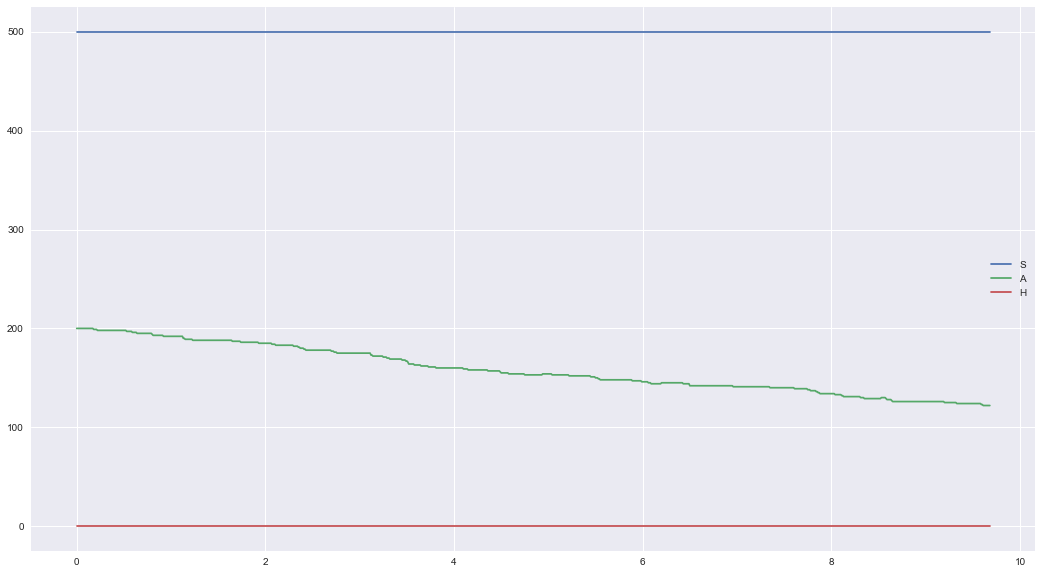

In [45]:
plt.figure(figsize=(18,10))
plt.plot(results['time'], results['S'], label='S')
plt.plot(results['time'], results['A'], label='A')
plt.plot(results['time'], results['H'], label='H')
plt.legend(loc='best')

